In [1]:
import matplotlib.pyplot as pl
import numpy as np
import tensorflow as tf

In [2]:
positive = np.vstack((
    np.concatenate(
        (np.random.normal(loc=1.0, scale=0.5, size=200),
         np.random.normal(loc=-1.0, scale=0.5, size=200))
    ),
    np.concatenate(
        (np.random.normal(loc=1.0, scale=0.5, size=200),
         np.random.normal(loc=-1.0, scale=0.5, size=200))
    )
)).T

print(positive)

[[ 1.14149007  0.96910245]
 [ 1.18705253  1.46819876]
 [ 1.01214536  1.0708726 ]
 [ 0.11588433  1.7757434 ]
 [ 1.50508733  1.17814054]
 [ 1.31802819  2.09196826]
 [ 1.02108903  0.88585048]
 [ 1.33965391  1.4107395 ]
 [ 0.72670591  1.54826581]
 [ 1.93663346  0.75953981]
 [ 1.24549769  0.37359656]
 [ 0.77764694  1.19542148]
 [ 0.87799165  0.69595743]
 [ 1.10297451  0.32997095]
 [ 0.98188444  0.70447013]
 [ 1.41750744  0.44026628]
 [ 1.81758426  1.14137284]
 [ 0.32288836  1.17434289]
 [ 1.56934473  0.51152732]
 [ 0.96893135  0.75229694]
 [ 1.1543291   0.97572332]
 [ 0.98610219  0.41425375]
 [ 1.48298734  1.83262878]
 [ 0.73409344  1.47379369]
 [ 1.9846461   0.34941904]
 [ 0.61910228  1.03937465]
 [ 1.05292212  0.86937498]
 [ 0.35385938  1.27521162]
 [ 1.45324207  0.50064693]
 [ 1.25882004  0.79188966]
 [ 0.79789077  0.327824  ]
 [ 1.33760374 -0.04216167]
 [ 0.92491374  1.12521656]
 [ 1.46411982  2.44041706]
 [ 1.52273531  0.65468133]
 [ 0.05254928  0.74597423]
 [ 1.41977146  1.28862155]
 

In [3]:
negative = np.vstack((
    np.concatenate(
        (np.random.normal(loc=1.0, scale=0.5, size=200),
         np.random.normal(loc=-1.0, scale=0.5, size=200))
    ),
    np.concatenate(
        (np.random.normal(loc=-1.0, scale=0.5, size=200),
         np.random.normal(loc=1.0, scale=0.5, size=200))
    )
)).T

In [4]:
data = np.vstack((positive, negative))
labels = np.vstack(([[1, 0]]*400, [[0, 1]]*400));

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, input_shape=(2,), activation="tanh", kernel_initializer=tf.keras.initializers.GlorotNormal(),),
    tf.keras.layers.Dense(2, activation="softmax")
])

In [5]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metric=['accuracy']);

model.fit(data, labels, epochs=100)

Train on 800 samples
Epoch 1/100
800/800 [==============================] - 1s 1ms/sample - loss: 0.7835
Epoch 2/100
800/800 [==============================] - 0s 95us/sample - loss: 0.7615
Epoch 3/100
800/800 [==============================] - 0s 100us/sample - loss: 0.7435
Epoch 4/100
800/800 [==============================] - 0s 91us/sample - loss: 0.7297
Epoch 5/100
800/800 [==============================] - 0s 90us/sample - loss: 0.7194
Epoch 6/100
800/800 [==============================] - 0s 114us/sample - loss: 0.7117
Epoch 7/100
800/800 [==============================] - 0s 79us/sample - loss: 0.7055
Epoch 8/100
800/800 [==============================] - 0s 88us/sample - loss: 0.7011
Epoch 9/100
800/800 [==============================] - 0s 135us/sample - loss: 0.6975
Epoch 10/100
800/800 [==============================] - 0s 112us/sample - loss: 0.6946
Epoch 11/100
800/800 [==============================] - 0s 85us/sample - loss: 0.6922
Epoch 12/100
800/800 [=================

800/800 [==============================] - 0s 61us/sample - loss: 0.2163
Epoch 96/100
800/800 [==============================] - 0s 61us/sample - loss: 0.2147
Epoch 97/100
800/800 [==============================] - 0s 54us/sample - loss: 0.2130
Epoch 98/100
800/800 [==============================] - 0s 89us/sample - loss: 0.2116
Epoch 99/100
800/800 [==============================] - 0s 75us/sample - loss: 0.2101
Epoch 100/100
800/800 [==============================] - 0s 111us/sample - loss: 0.2088


In [6]:
predicted = model.predict(data)

same = 0
for i in range(len(labels)):
    same += np.argmax(predicted[i]) == np.argmax(labels[i])

print("Accuracy: ", float(same)/float(len(labels)))

Accuracy:  0.93625


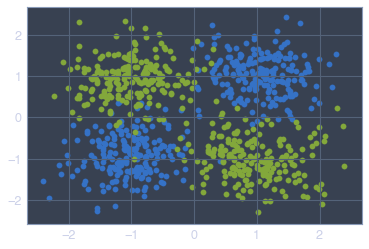

In [7]:
pl.scatter(positive[:,0], positive[:, 1])
pl.scatter(negative[:,0], negative[:, 1])
pl.show()